![Image of world map](https://wallpaperaccess.com/full/233081.jpg)

## Clustering the Countries by using Unsupervised Learning for HELP International

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. 

In [1]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

In [2]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## Task 1: Reading and Inspection

-  ### Subtask 1.1 : Import and read

In [3]:
# reading data file
countries = pd.read_csv("Country-data.csv")
countries.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
countries.tail()

country  child_mort  exports  health  imports  income  inflation  \
162    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
164    Vietnam        23.3     72.0    6.84     80.2    4490      12.10   
165      Yemen        56.3     30.0    5.18     34.4    4480      23.60   
166     Zambia        83.1     37.0    5.89     30.9    3280      14.00   

     life_expec  total_fer   gdpp  
162        63.0       3.50   2970  
163        75.4       2.47  13500  
164        73.1       1.95   1310  
165        67.5       4.67   1310  
166        52.0       5.40   1460

-  ### Subtask 1.2 : Inspect the dataframe

In [5]:
countries.shape    # checking the size of dataframe

(167, 10)

In [6]:
countries.columns  # all the columns in the dataframe

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
countries.info()  # checking for variable data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# checking if there is any spelling mistake in countries column
# or same country is repeated with different name
countries.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

**data looks ok. No spelling mistakes.**

In [9]:
# checking for missing values
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**we do not have any missing values.**

In [10]:
# from data dictionary we can see that import , export and helth are given as percentage of 
# GDP per capita. 
# so in order to get correct statistical description of data we need to fix these values.

# for export 
countries["exports"] = round((countries["exports"] * countries["gdpp"]) / 100, 2)

# for health
countries["health"] = round((countries["health"] * countries["gdpp"]) / 100, 2)

# for impotrs
countries["imports"] = round((countries["imports"] * countries["gdpp"]) / 100, 2)

In [11]:
countries.head()  # checking for correct changes

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2    55.30   41.92   248.30    1610   
1              Albania        16.6  1145.20  267.90  1987.74    9930   
2              Algeria        27.3  1712.64  185.98  1400.44   12900   
3               Angola       119.0  2199.19  100.60  1514.37    5900   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [12]:
# checking for statistical information
countries.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618862  1056.733174    6588.352096   17144.688623   
std     40.328931   17973.885789  1801.408921   14710.810423   19278.067698   
min      2.600000       1.080000    12.820000       0.650000     609.000000   
25%      8.250000     447.140000    78.535000     640.215000    3355.000000   
50%     19.300000    1777.440000   321.890000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## Task 2 : Exploratory Data Analysis

- ### Subtask 2.1 : Univariate Analysis

In [13]:
countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

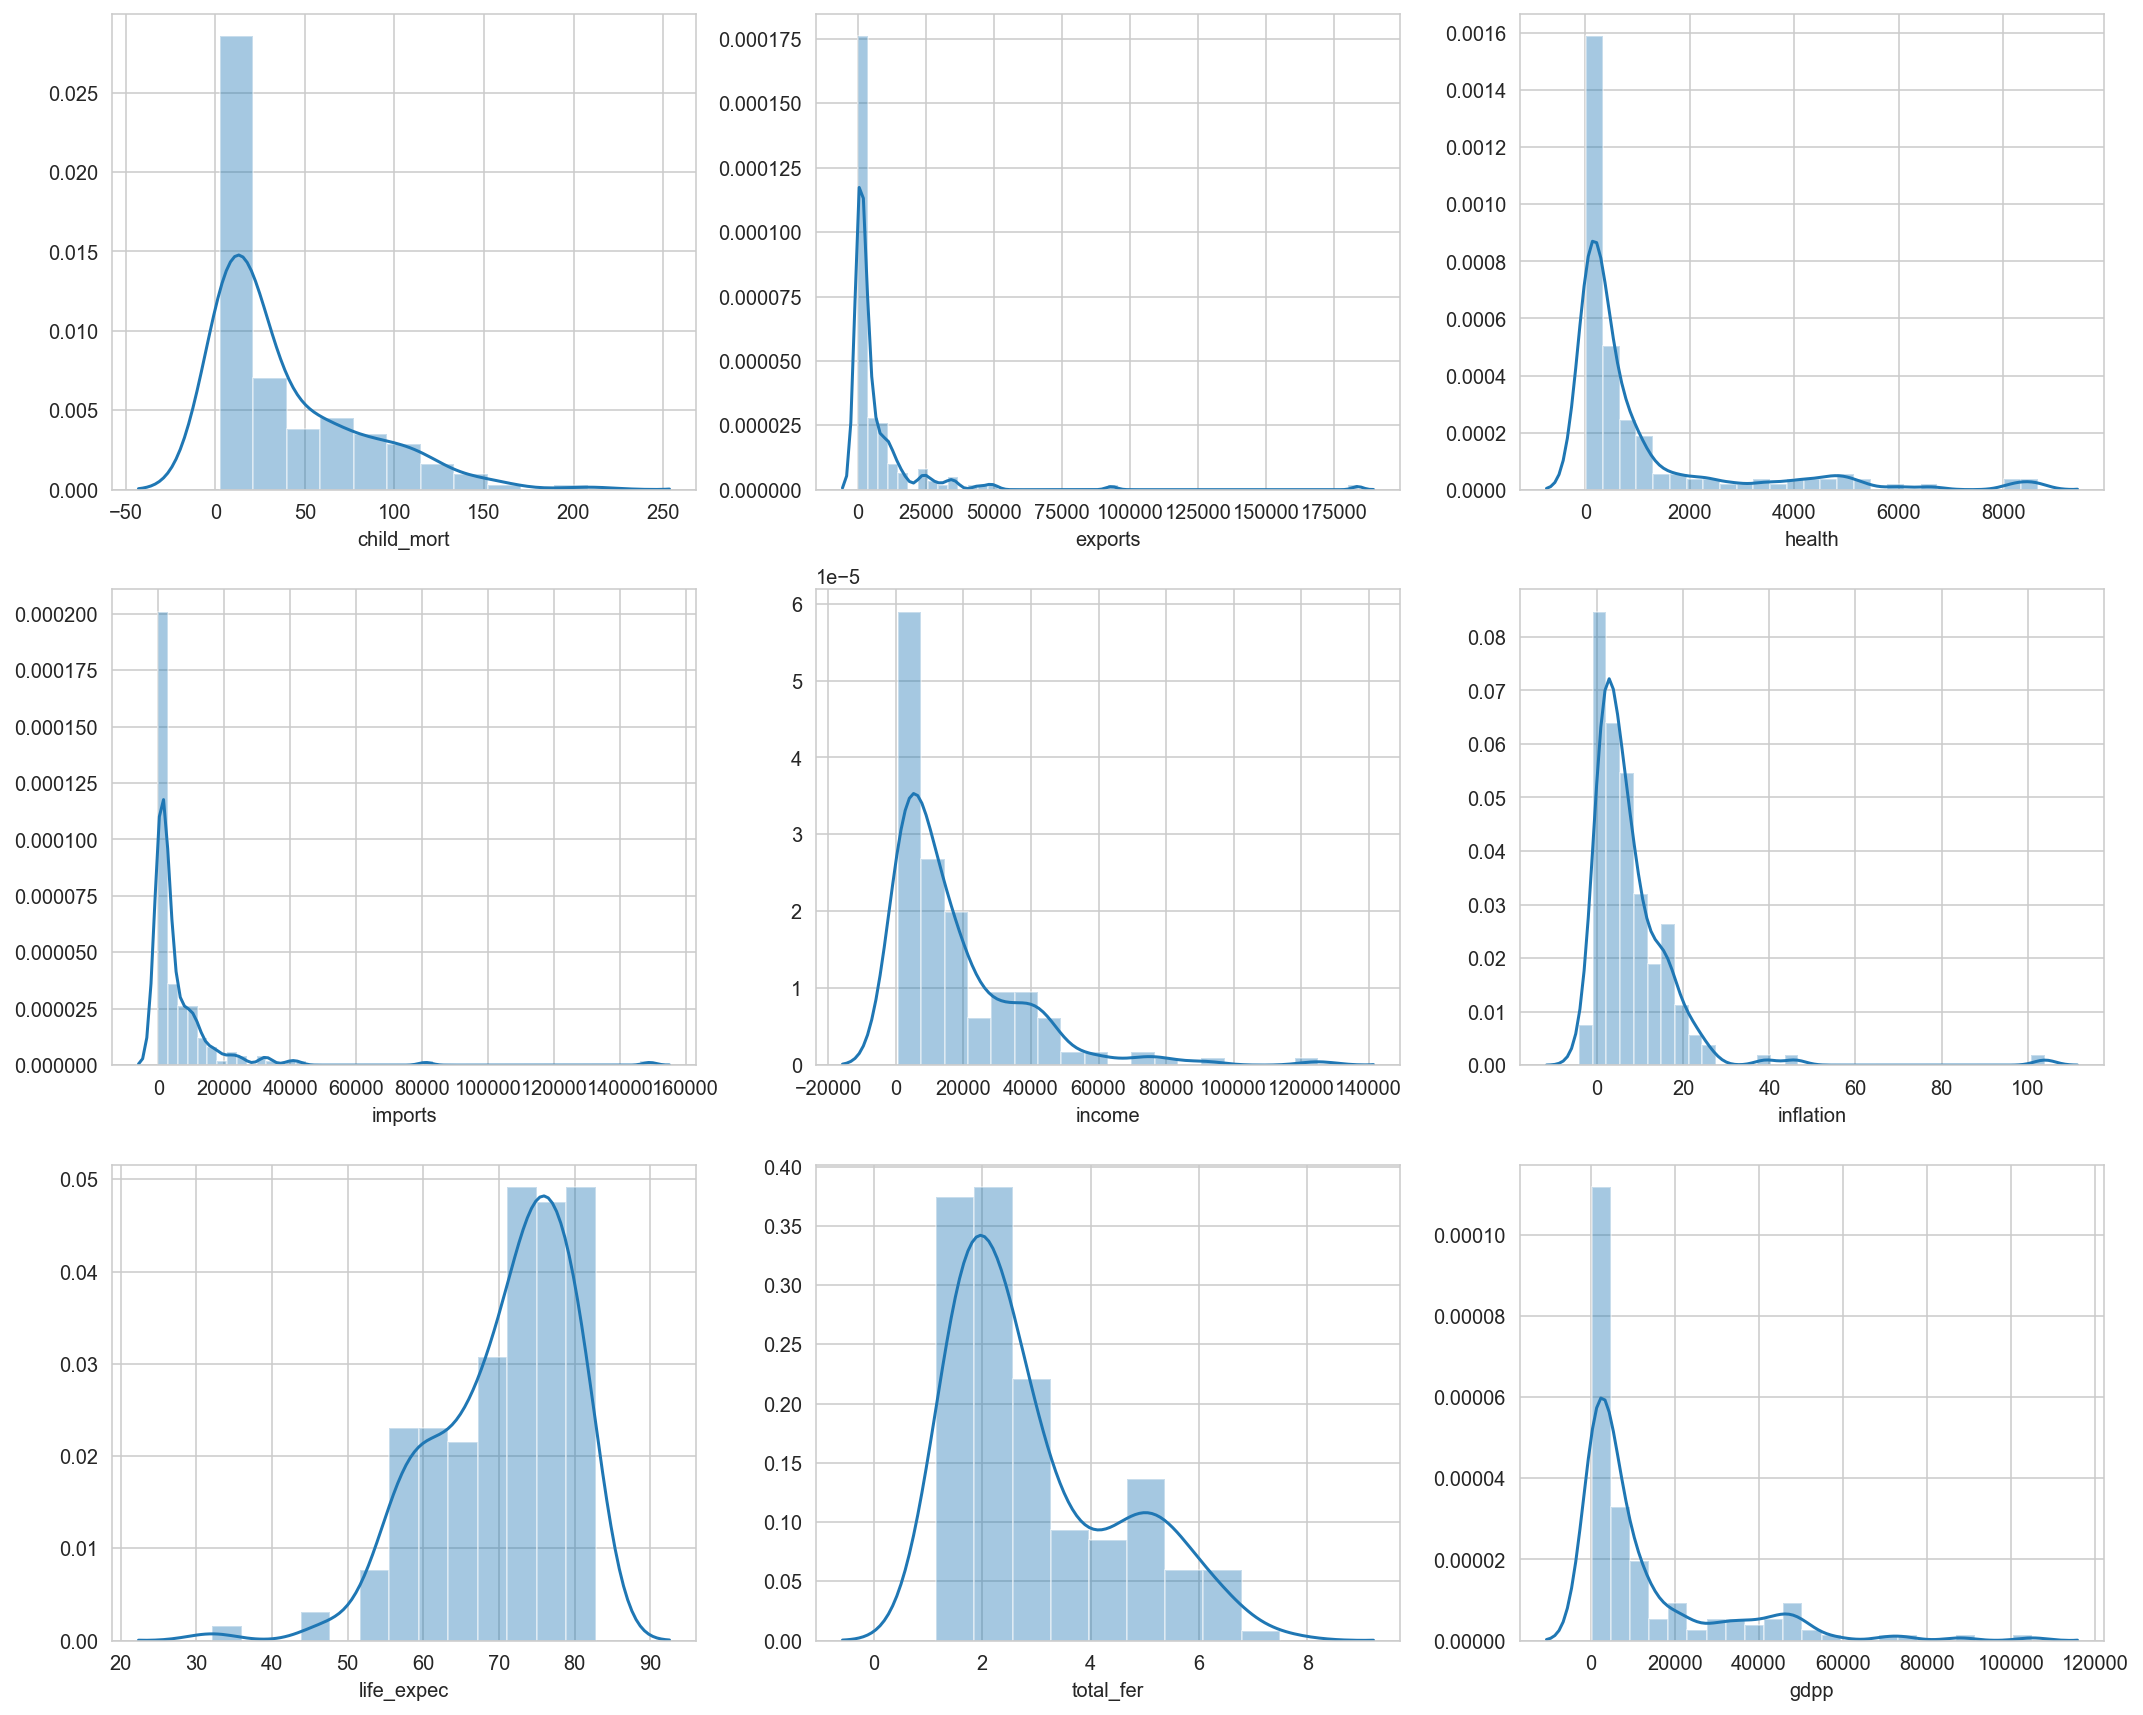

In [14]:
# lets check for data distribution using histogram
plt.figure(figsize=(15,12))
features = ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']

sns.set_style("whitegrid")

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(countries[i[1]])

plt.tight_layout()
plt.show()

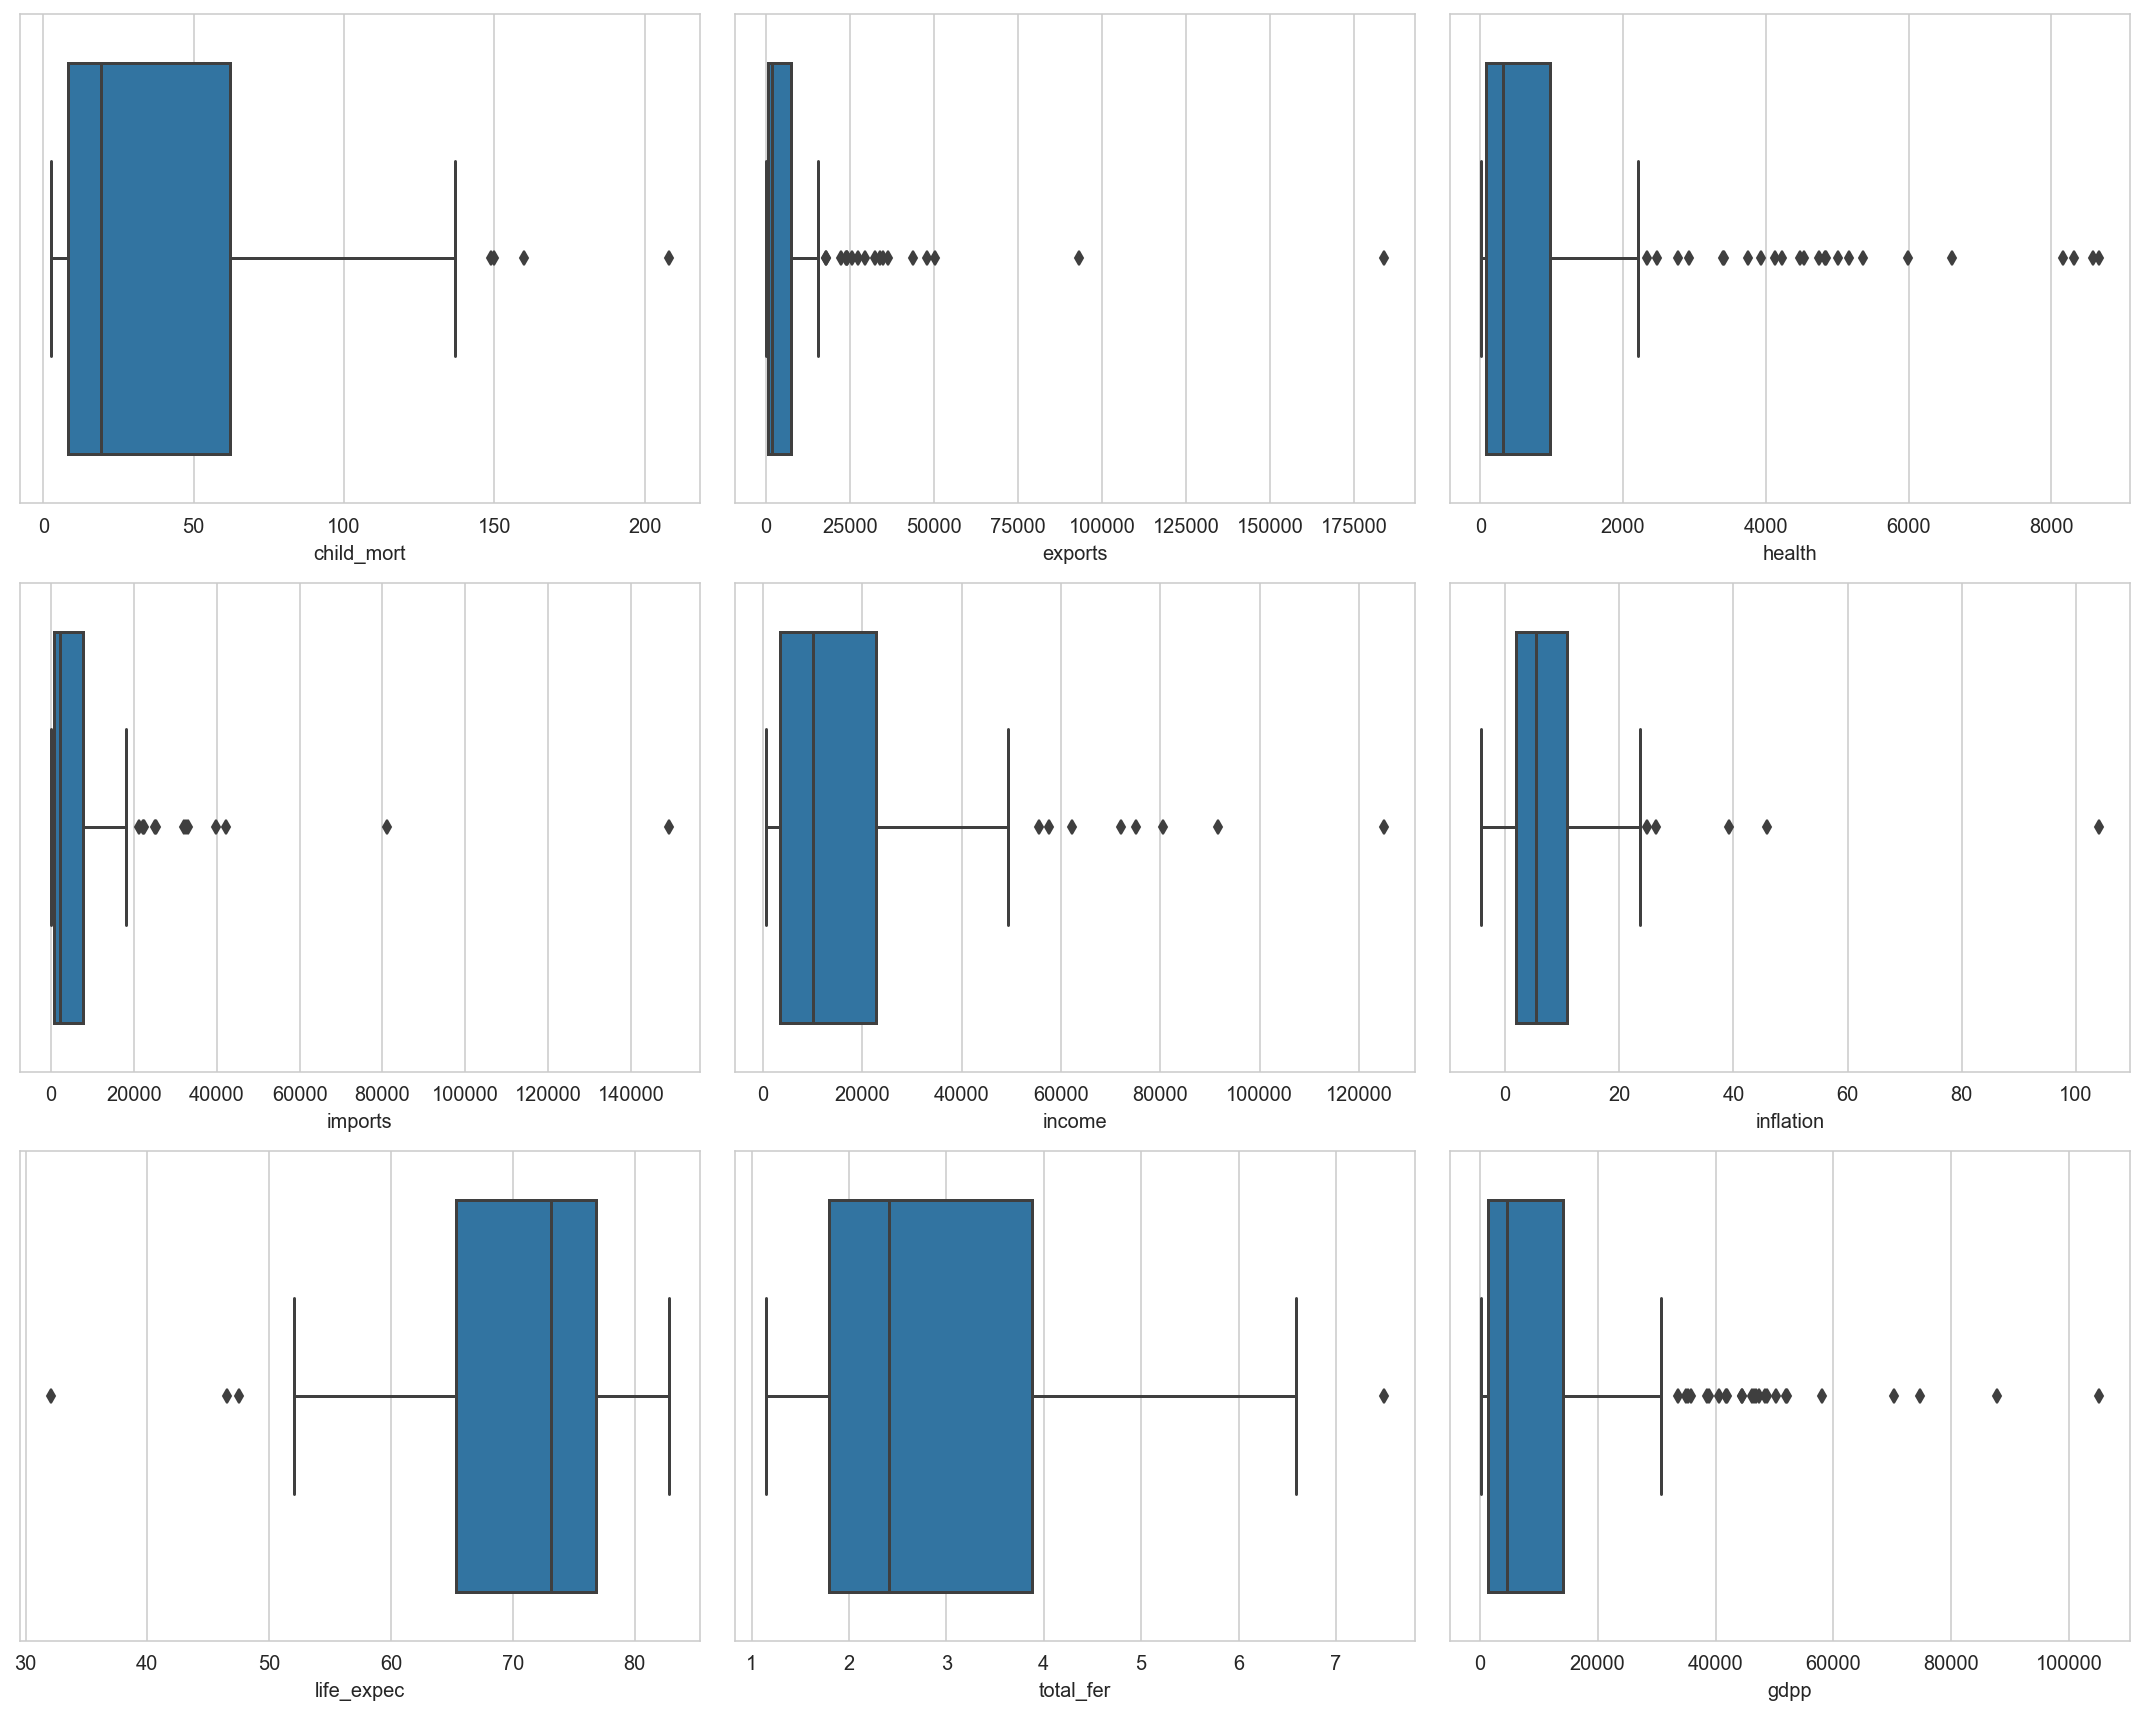

In [15]:
# lets check for data distribution using boxplots
plt.figure(figsize=(15,12))
features = ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']

sns.set_style("whitegrid")

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countries[i[1]])

plt.tight_layout()
plt.show()

### Observations from boxplot and distribution plot :

- **child mortality :** we can see clearly that it is right skwed distribution. some countries have very high child mortality rate.There are some outliers present.
- **exports :** we can see it is a highly right skewed distribution. some countries do very heavy export. There are some outliers present in the data.
- **helath :** Its a right skewed distribution. there are some outliers present in the data.
- **imports :** Its a right skewed distribution. there are some outliers present in the data.
- **income :** Its a right skwed distribution, some outlier countries having high income compare to others.
- **inflation :** its slightly right skewed distributed, but have some outliers. some countries are suffering from very high inflation.
- **life expectancy :** its a left skewd distribution. some countries having very low life expectancy.
- **total fertality :** its a pretty much normally distributed. 
- **GDP per capita :** highly right skwed distribution. with some outliers.

- ### Subtask 2.2 : Bivariate Analysis

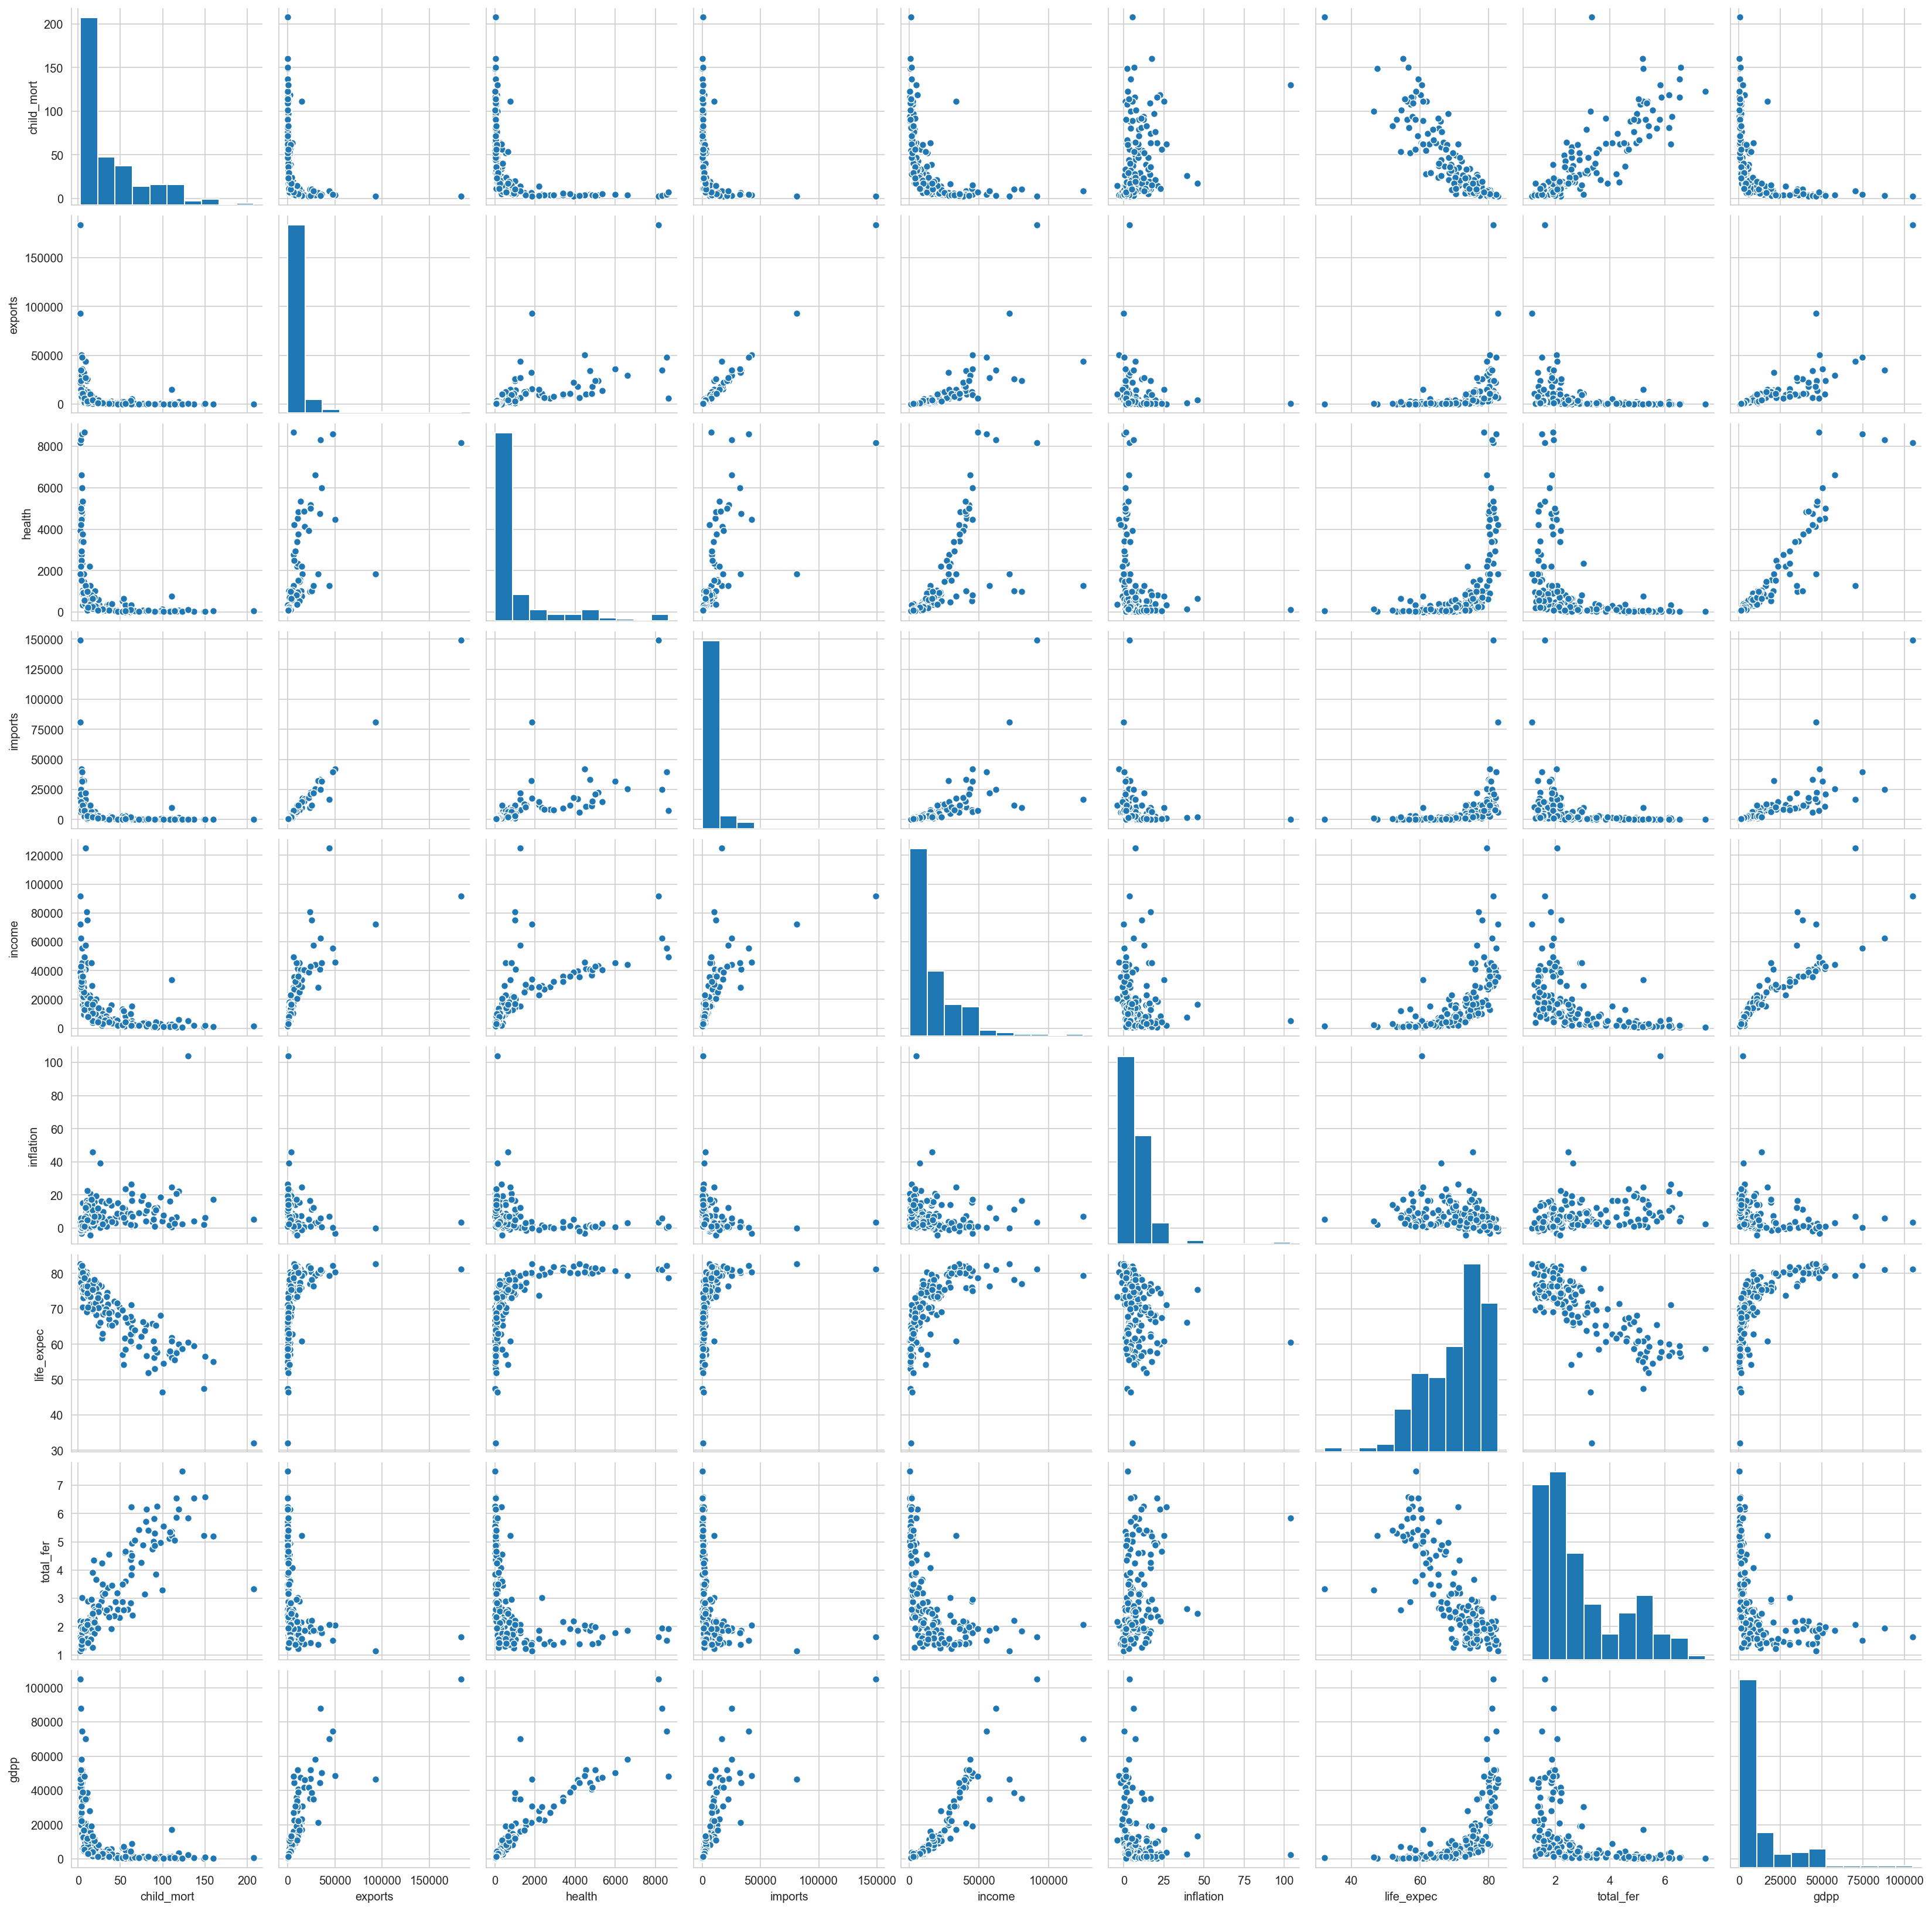

In [16]:
# lets check for pairplots
sns.pairplot(countries)

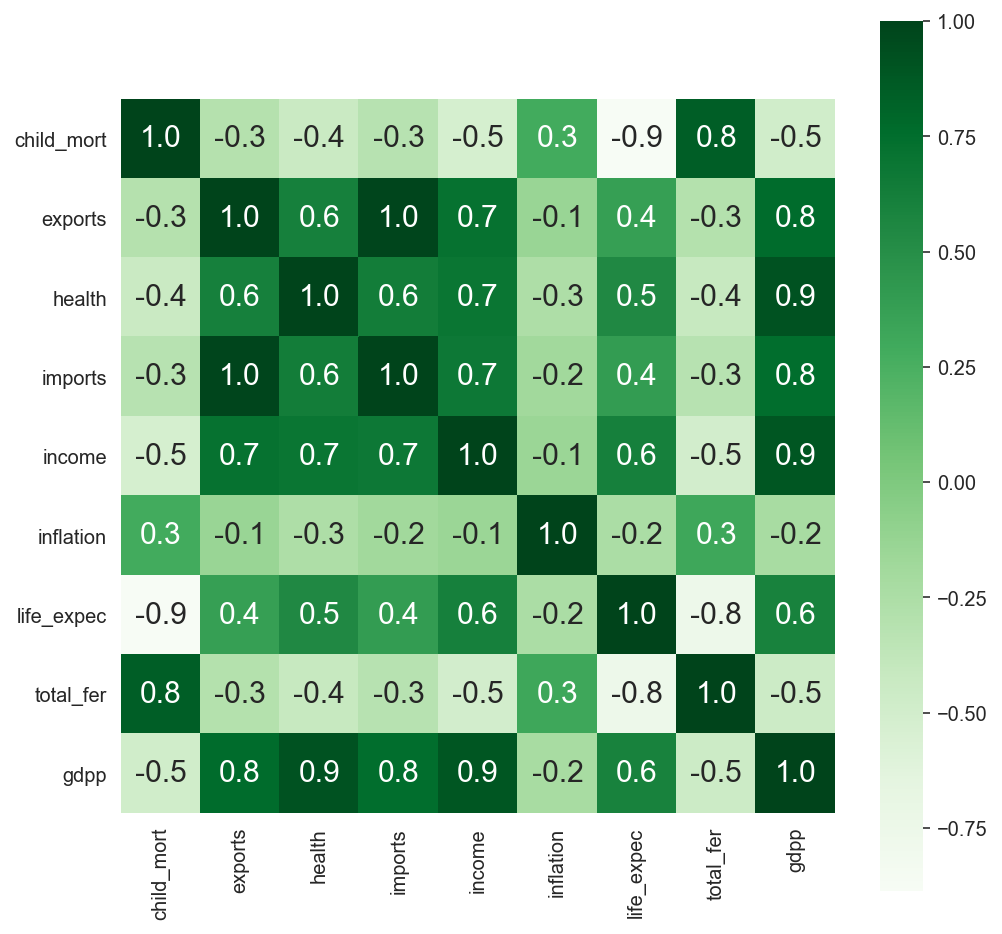

In [17]:
# lets also check for heatmap for better understanding of correlation
cor_matrix = countries.corr()

plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix, cbar=True, square=True, fmt=".1f", 
            annot=True, annot_kws={'size' : 15}, cmap="Greens")

### Observations from pairplot and Heatmap :

- There is a very high negative trend between child mortality rate and life expectancy. A countries where life expectancy is low, child mortality rate must be pretty high.

- There is high positive trend between child mortality rate and total fertality rate. there are some countries where female give birth to more number of childern and expecting some of them will survive. due to high mortality rate.

- Income having high postive correlation with export, import, health. countries with more income will spend more on helthh, imports and sending more exports.

- Gdp per capita having high positive correlation with export, health, import, income. countries with high gdpp must be developed countries with better socio-economic conditions.



## Task 3 : Data preparation for clustering.

- ### Subtask 3.1 : Outlier detection and treatment

In [18]:
# from the boxplot we plot during EDA we can obscerve, outliers present in the data.
countries.shape

(167, 10)

In [19]:
# since we have only 167 rows and few outliers, we cant afford to lose data.
# so instade of removing an outlier we will go for capping the outliers

# lets check data for different percentile
countries.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618862  1056.733174    6588.352096   17144.688623   
std     40.328931   17973.885789  1801.408921   14710.810423   19278.067698   
min      2.600000       1.080000    12.820000       0.650000     609.000000   
1%       2.800000      22.246800    17.008800     104.911600     742.240000   
5%       3.460000      70.470000    26.716000     169.281000    1213.000000   
25%      8.250000     447.140000    78.535000     640.215000    3355.000000   
50%     19.300000    1777.440000   321.890000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
1%      -2.348800   47.160000    1.243200     331.620000  
5%       0.183400   55.780000    1.390000     465.900000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [20]:
# lets cap the outliers to 5 - 95 percentile.
# we want to cap the outliers and also we dont want to variation in the data.
# selecting variables having upper outliers lets cap at 95 percentaile
features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'total_fer', 'gdpp']

#writing a for loop for capping outliers 

for i in features:
    q2 = countries[i].quantile(0.95) # upperlimit is 95 percentile
    
    countries[i][countries[i] >= q2] = q2
    
# for lower outlier lets cap at 5 percentile

q1 = countries["life_expec"].quantile(0.05) # lower limit is 5 percentile

countries["life_expec"][countries["life_expec"] <= q1] = q1

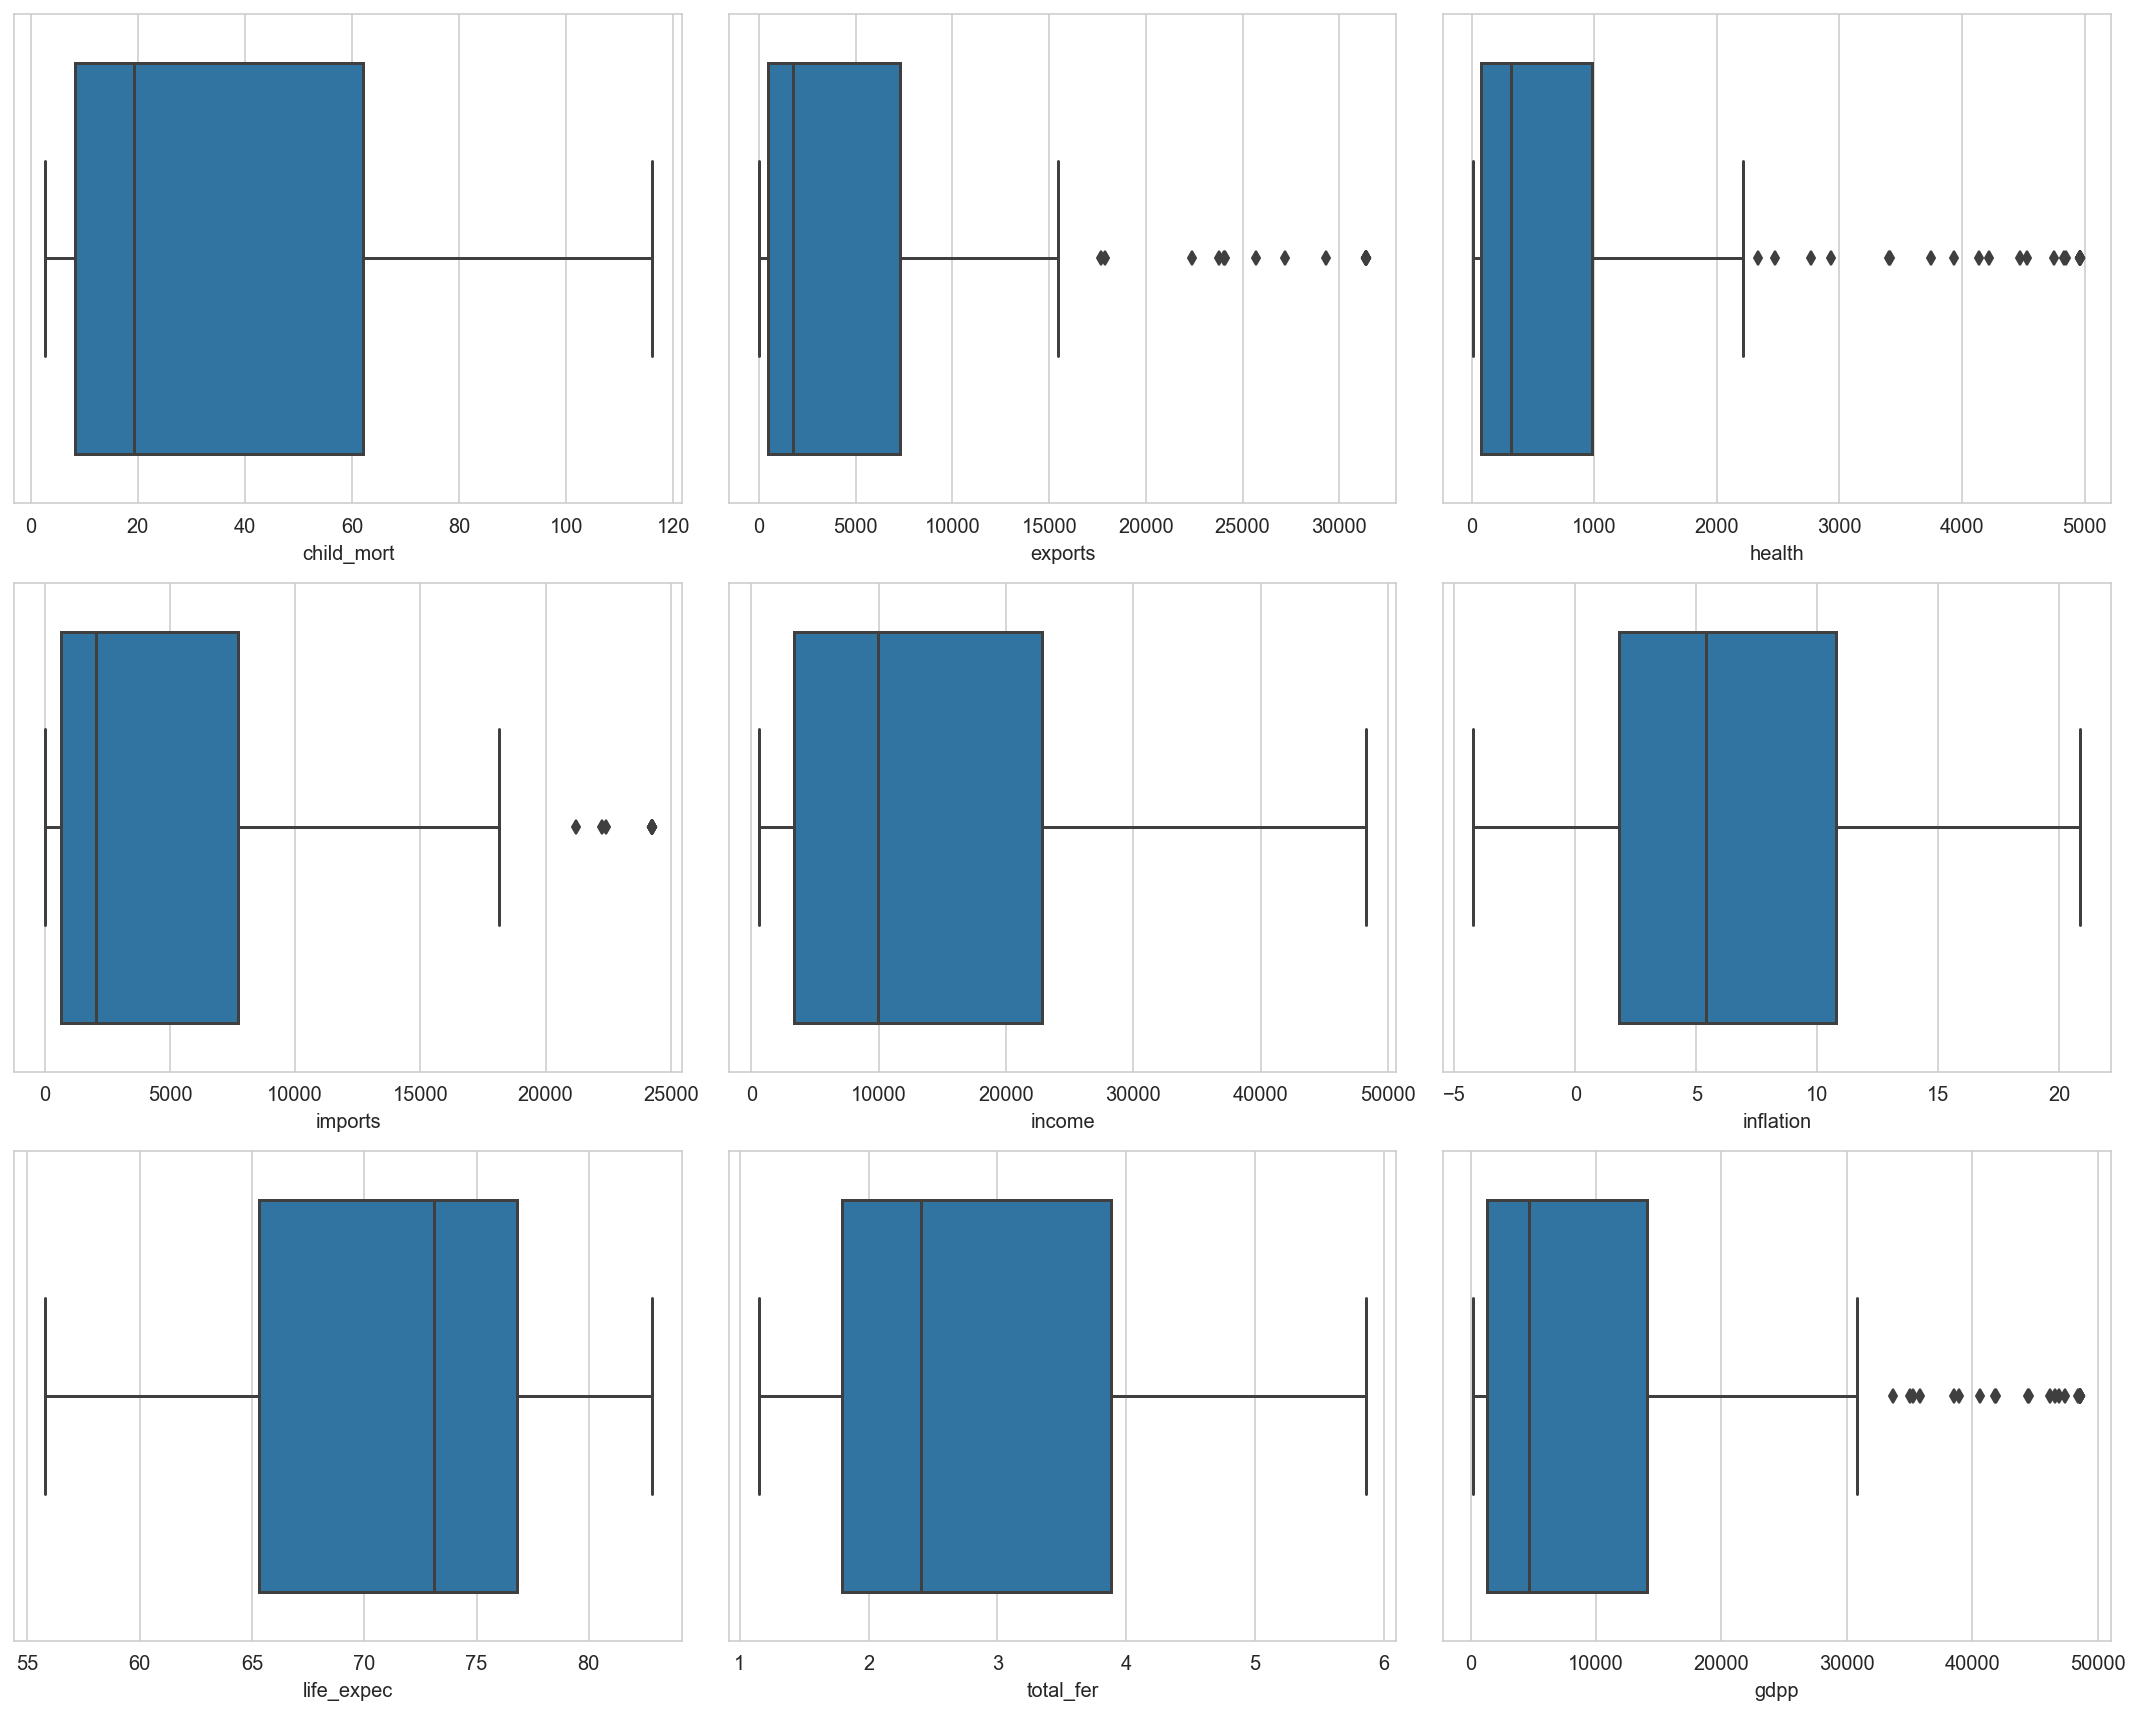

In [21]:
# checking the effect of outlier capping

plt.figure(figsize=(15,12))
features = ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']

sns.set_style("whitegrid")

for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countries[i[1]])

plt.tight_layout()
plt.show()

distribution of data now look much better than before.

- ### Subtask 3.2 : Scaling Data

In [22]:
countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [23]:
countries_scaling = countries.copy()  # creating copy for scaling the data

In [24]:
countries_scaling.drop('country',axis=1, inplace=True) # droping country column

In [25]:
scaler = StandardScaler() # creating instance of standardscaler

In [26]:
countries_scaled = scaler.fit_transform(countries_scaling)

In [27]:
# creating scaled dataframe
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
                            'inflation', 'life_expec', 'total_fer', 'gdpp']

countries_scaled.head() # checking for changes

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.479341 -0.669581 -0.629434 -0.732728 -0.958349   0.394438   -1.819049   
1   -0.559029 -0.542172 -0.473485 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.262690 -0.475838 -0.530018 -0.560152 -0.192552   1.440750    0.699208   
3    2.193878 -0.418960 -0.588939 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.733509 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

- ### Subtask 3.3 : Hopkins Test

In [28]:
# lets check for cluster tendancy of the data
# function for hopkins test

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
hopkins(countries_scaled)

0.8008524526700296

**Since hopkins score is more than 0.7, we can say that our data have clustering tendency.**

## Clustering



## Task 4 : K-Means Clustering

- ### Subtask 4.1 : finding optimal number of clusters

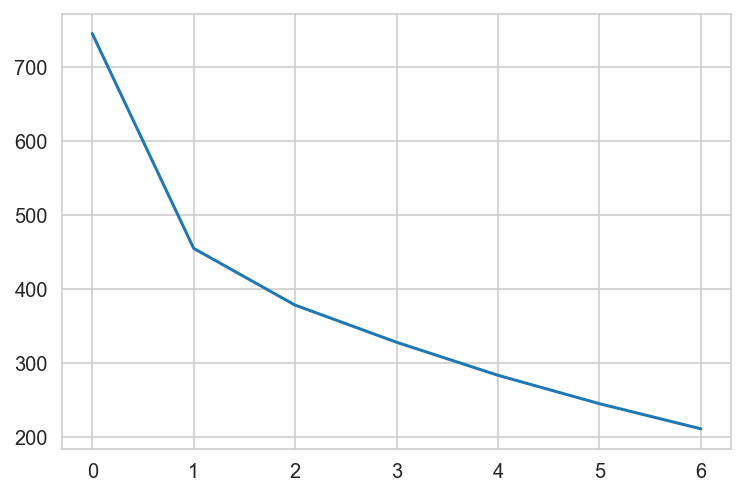

In [30]:
# elbow-curve method

ssd = []
range_n_cluster = [2,3,4,5,6,7,8]

for n in range_n_cluster:
    kmeans = KMeans(n_clusters=n, max_iter=50, random_state=100)
    kmeans.fit(countries_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

x axis in above plot is just a index number

range_n_cluster = 2,3,4,5,6,7,8 in above graph 0=2, 1=3, etc.

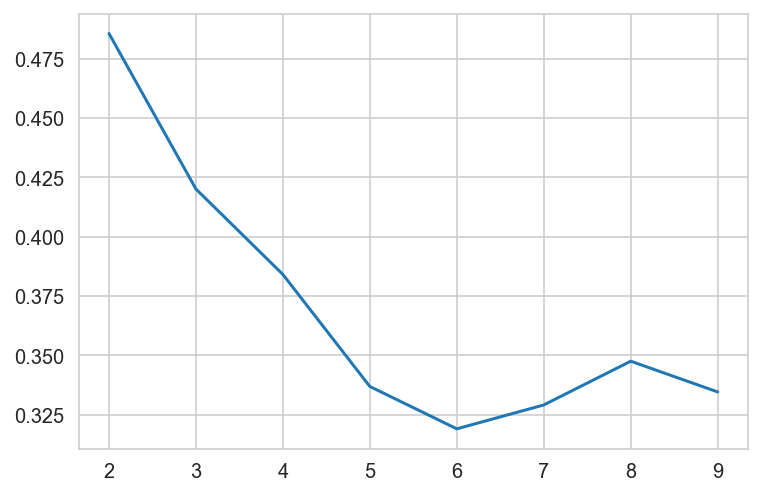

In [31]:
# silhouette analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k,max_iter=100, random_state=100).fit(countries_scaled)
    ss.append([k, silhouette_score(countries_scaled, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [32]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100, random_state=100)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4856761567903262
For n_clusters=3, the silhouette score is 0.42014564656187364
For n_clusters=4, the silhouette score is 0.38415028263222717
For n_clusters=5, the silhouette score is 0.33693054229864733
For n_clusters=6, the silhouette score is 0.3190874864417076
For n_clusters=7, the silhouette score is 0.32914734395811257
For n_clusters=8, the silhouette score is 0.3475897768734148


- from elbow curve we can see it is suggesting 3 cluster as optimal value since after 3 slope is decreasing at less rate compare to previous 3 cluster. we can see elbow at 3.


- average silhouette score for 2 cluster is high, but average silhouette score difference between 2 and 3 is not that big, 3 cluster can also give good quality clusters.

**lets choose 3 clusters for further analysis.**

- ### Subtask 4.2 : running K-Means with 3 clusters

In [33]:
# with 3 cluster k-means
kmeans = KMeans(n_clusters=3, max_iter=100, random_state = 100)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [35]:
# assigining the labels to perticular data point
countries["cluster_id"] = kmeans.labels_
countries.head() # checking for changes

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       116.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2      5.820    553           1  
1       4.49        76.3      1.650   4090           2  
2      16.10        76.5      2.890   4460           2  
3      20.87        60.1      5.861   3530           1  
4       1.44        76.8      2.130  12200           2

In [36]:
# changing data type of cluster_id for further analysis
countries["cluster_id"] = countries.cluster_id.apply(str)

In [37]:
countries.info() # checking for changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  cluster_id  167 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 14.5+ KB


- ### Subtask 4.3 : Cluster Profiling

In [38]:
# counting how much data points assigned to each cluster
countries["cluster_id"].value_counts()

2    82
1    48
0    37
Name: cluster_id, dtype: int64

From above distribution of datapoints to cluster, we can see they are not equally distributed but it is a fair enough distribution. so no unnecessary clusters present.

In [39]:
# lets visualize the clusters 
# GDP per capita vs Child mortality rate
px.scatter(countries, x="child_mort", y="gdpp", hover_name="country", color="cluster_id", 
           width=700, height=400, template="plotly_dark", 
           labels={"child_mort":"Child Mortality Rate", "gdpp":"GDP per capita"},
           title="GDP per capita vs Child Mortality Rate")

#### Observation:

- **cluster 2 :** countries with medium level or average level of GDP per capita and medium or average level of Child mortality rate.

- **cluster 0 :** countries with very high GDP per capita and very low Child Mortality Rate.

- **cluster 1 :** countries with very low GDP per capita and very high Child Mortality Rate.

In [40]:
# GDP per capita vs Income 
px.scatter(countries, x="income", y="gdpp", hover_name="country", color="cluster_id", 
           width=700, height=400, template="plotly_dark", 
           labels={"income":"Income", "gdpp":"GDP per capita"},
           title="GDP per capita vs Income")

**we can see here cluster 1 and cluster 2 are overlaping. but cluster 2 looks better in comparision with cluster 1 in both GDP per capita and Income terms.**


**cluster 0 is clearly looks most better with High GDP per capita and High Income in comparision with cluster 1 and cluster 2.**

In [41]:
# lets check for Income vs Child Mortality Rate
px.scatter(countries, x="child_mort", y="income", hover_name="country", color="cluster_id", 
           width=700, height=400, template="plotly_dark", 
           labels={"income":"Income", "child_mort":"Child Mortality Rate"},
           title="Child Mortality Rate vs Income")

#### Observation:

- **cluster 2 :** countries with medium level or average level of Income and medium or average level of Child mortality rate.

- **cluster 0 :** countries with very high Income and very low Child Mortality Rate.

- **cluster 1:** countries with very low Income and very high Child Mortality Rate.

In [42]:
cluster_analysis = countries[["gdpp","child_mort","income","cluster_id"]].groupby("cluster_id").mean()

In [43]:
cluster_analysis # Centroid location for each clusters

gdpp  child_mort        income
cluster_id                                        
0           37745.675676    5.237838  38711.081081
1            1909.208333   86.443750   3897.354167
2            6287.463415   21.951220  12304.756098

In [44]:
px.bar(cluster_analysis,log_y=True, barmode='group',height=450,width=700, template="simple_white")

#### Observation:

- **cluster 2 :** countries with moderate level of GDP per capita ,moderate level of Child mortality rate and moderate level of Income 

- **cluster 0 :** countries with very high GDP per capita, very low Child Mortality Rate and very high income.

- **cluster 1 :** countries with very low GDP per capita, very high Child Mortality Rate and very low income.

countries in cluster 0 shows the characteristics Developed Countries
 & countries in cluster 2 shows the characteristics Developing Countries
& countries in cluster 1 shows the characteristics Underdeveloped Countries.

**Cluster 0 : Developed countries**

**Cluster 1 : Underdeveloped Countries**

**Cluster 2 : Developing countries**

As given in the problem statement we need to find out countries who are in direst need of the aid, based on socio-economic conditions, so that HELP International can use its fund trategically and effectively.

as per our findings, countries in cluster 1 are under devloped countries who have a bad socio-economic conditions. now lets find out countires from cluster 1 who are in direst need.

In [45]:
# seperate out under developed countries
underdeveloped = countries[countries["cluster_id"] == "1"]
underdeveloped.head()

country  child_mort  exports  health  imports   income  inflation  \
0    Afghanistan        90.2    55.30   41.92   248.30   1610.0      9.440   
3         Angola       116.0  2199.19  100.60  1514.37   5900.0     20.870   
17         Benin       111.0   180.40   31.08   281.98   1820.0      0.885   
21      Botswana        52.5  2768.60  527.05  3257.55  13300.0      8.920   
25  Burkina Faso       116.0   110.40   38.76   170.20   1430.0      6.810   

    life_expec  total_fer  gdpp cluster_id  
0         56.2      5.820   553          1  
3         60.1      5.861  3530          1  
17        61.8      5.360   758          1  
21        57.1      2.880  6350          1  
25        57.9      5.861   575          1

In [46]:
# lets find top 10 countries who are in direst needs
needy_countries=underdeveloped.sort_values(by = ['gdpp','child_mort','income'],
                                           ascending=[True,False,True]).head(10)

In [47]:
needy_countries

country  child_mort  exports  health  imports  income  \
26                    Burundi        93.6    20.61   26.80    90.55   764.0   
88                    Liberia        89.3    62.46   38.59   302.80   700.0   
37           Congo, Dem. Rep.       116.0   137.27   26.42   165.66   609.0   
112                     Niger       116.0    77.26   17.96   170.87   814.0   
132              Sierra Leone       116.0    67.03   52.27   137.66  1220.0   
93                 Madagascar        62.2   103.25   15.57   177.59  1390.0   
106                Mozambique       101.0   131.99   21.83   193.58   918.0   
31   Central African Republic       116.0    52.63   17.75   118.19   888.0   
94                     Malawi        90.5   104.65   30.25   160.19  1030.0   
50                    Eritrea        55.2    23.09   12.82   112.31  1420.0   

     inflation  life_expec  total_fer  gdpp cluster_id  
26       12.30       57.70      5.861   231          1  
88        5.47       60.80      5.020   327          1  
37       20.80       57.50      5.861   334          1  
112       2.55       58.80      5.861   348          1  
132      17.20       55.78      5.200   399          1  
93        8.79       60.80      4.600   413          1  
106       7.64       55.78      5.560   419          1  
31        2.01       55.78      5.210   446          1  
94       12.10       55.78      5.310   459          1  
50       11.60       61.70      4.610   482          1

As per the K-means algorithm, countries which are in dierst need are as follow :
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Task 5 : Hierarchical Clustering

- ### Subtask 5.1 : using single linkage and complete linkage

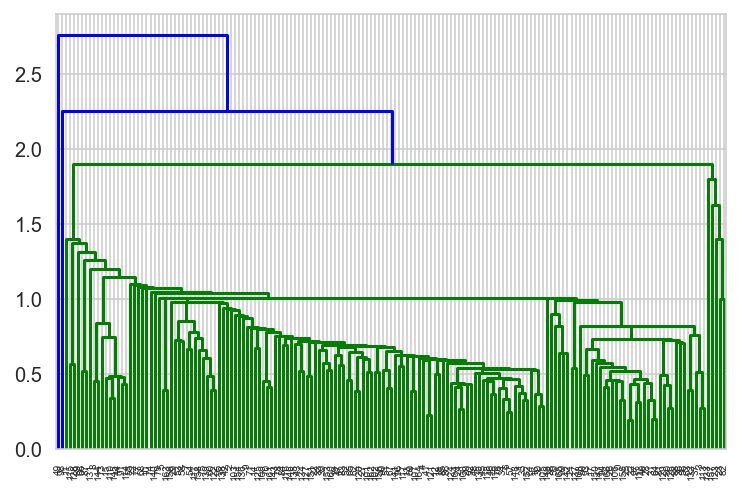

In [48]:
# using single linkage
h_clusters = linkage(countries_scaled, method='single', metric="euclidean")
dendrogram(h_clusters)
plt.show()

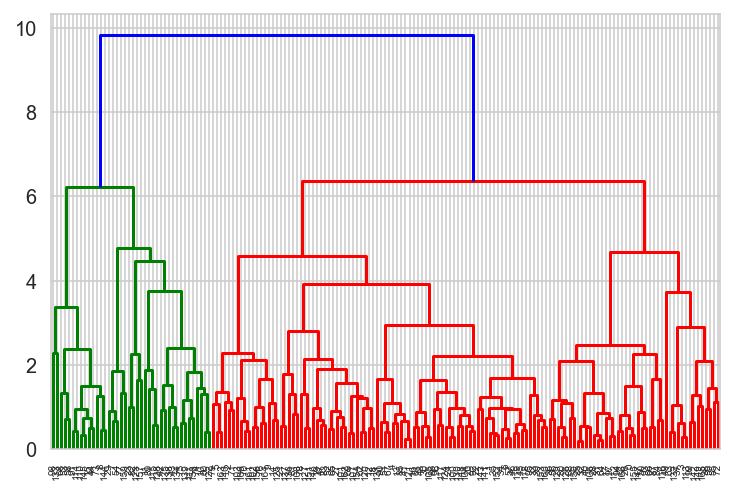

In [49]:
# using complete linkage
h_clusters = linkage(countries_scaled, method='complete', metric='euclidean')
dendrogram(h_clusters)
plt.show()

from dendrogram of single linkage and complete linkage, we can see complete linkage clearly have done a great job. 

dendrogram with complete linkage suggesting for 2 cluster, but 3 cluster is making more sense to divide countries in 3 groups, to find most needy countries.

In [50]:
# lets cut the tree at 3 clusters
cluster_labels = cut_tree(h_clusters, n_clusters=3).reshape(-1,)

In [51]:
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [52]:
# assign cluser labels to data
countries["cluster_labels"] = cluster_labels

In [53]:
countries.head() # checking for changes

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    55.30   41.92   248.30   1610.0   
1              Albania        16.6  1145.20  267.90  1987.74   9930.0   
2              Algeria        27.3  1712.64  185.98  1400.44  12900.0   
3               Angola       116.0  2199.19  100.60  1514.37   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.66  7185.80  19100.0   

   inflation  life_expec  total_fer   gdpp cluster_id  cluster_labels  
0       9.44        56.2      5.820    553          1               0  
1       4.49        76.3      1.650   4090          2               1  
2      16.10        76.5      2.890   4460          2               1  
3      20.87        60.1      5.861   3530          1               0  
4       1.44        76.8      2.130  12200          2               1

In [54]:
# changing data type of cluster labels to object for further analysis.
countries["cluster_labels"] = countries["cluster_labels"].apply(str)

In [55]:
countries["cluster_labels"].dtypes # checking for changes

dtype('O')

- ### Subtask 5.2 : Cluster Profiling

In [56]:
countries["cluster_labels"].value_counts()

1    84
0    43
2    40
Name: cluster_labels, dtype: int64

From above distribution of datapoints to cluster, we can see they are not equally distributed but it is a fair enough distribution. so no unnecessary clusters present.

In [57]:
# lets visualize the clusters 
# GDP per capita vs Child mortality rate
px.scatter(countries, x="child_mort", y="gdpp", hover_name="country", color="cluster_labels", 
           width=700, height=400, template="plotly_dark", 
           labels={"child_mort":"Child Mortality Rate", "gdpp":"GDP per capita"},
           title="GDP per capita vs Child Mortality Rate")

#### Observation:

- **cluster 1 :** countries with medium level or average level of GDP per capita and medium or average level of Child mortality rate.

- **cluster 2 :** countries with very high GDP per capita and very low Child Mortality Rate.

- **cluster 0 :** countries with very low GDP per capita and very high Child Mortality Rate.

In [58]:
# GDP per capita vs Income 
px.scatter(countries, x="income", y="gdpp", hover_name="country", color="cluster_labels", 
           width=700, height=400, template="plotly_dark", 
           labels={"income":"Income", "gdpp":"GDP per capita"},
           title="GDP per capita vs Income")

**we can see here cluster 1 and cluster 0 are overlaping. but cluster 1 looks better in comparision with cluster 0 in both GDP per capita and Income terms.**


**cluster 2 is clearly looks most better with High GDP per capita and High Income in comparision with cluster 0 and cluster 1.**

In [59]:
# lets check for Income vs Child Mortality Rate
px.scatter(countries, x="child_mort", y="income", hover_name="country", color="cluster_labels", 
           width=700, height=400, template="plotly_dark", 
           labels={"income":"Income", "child_mort":"Child Mortality Rate"},
           title="Child Mortality Rate vs Income")

#### Observation:

- **cluster 1 :** countries with medium level or average level of Income and medium or average level of Child mortality rate.

- **cluster 2 :** countries with very high Income and very low Child Mortality Rate.

- **cluster 0:** countries with very low Income and very high Child Mortality Rate.

In [60]:
cluster_analysis = countries[["gdpp","child_mort","income","cluster_labels"]].groupby("cluster_labels").mean()

In [61]:
cluster_analysis # Centroid location for each clusters

gdpp  child_mort        income
cluster_labels                                        
0                1628.883721   90.611628   3483.790698
1                5791.333333   23.916667  11023.333333
2               36182.250000    5.945000  38815.250000

In [62]:
px.bar(cluster_analysis,log_y=True, barmode='group',height=450,width=700, template="simple_white")

#### Observation:

- **cluster 1 :** countries with moderate level of GDP per capita ,moderate level of Child mortality rate and moderate level of Income 

- **cluster 2 :** countries with very high GDP per capita, very low Child Mortality Rate and very high income.

- **cluster 0 :** countries with very low GDP per capita, very high Child Mortality Rate and very low income.

**Cluster 2 : Developed countries**

**Cluster 0 : Underdeveloped Countries**

**Cluster 1 : Developing countries**

As given in the problem statement we need to find out countries who are in direst need of the aid, based on socio-economic conditions, so that HELP International can use its fund trategically and effectively.

as per our findings, countries in cluster 0 are underdevloped countries who have a bad socio-economic conditions. now lets find out countires from cluster 1 who are in direst need.

In [63]:
# seperate out under developed countries
underdeveloped = countries[countries["cluster_labels"] == "0"]
underdeveloped.head()

country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2    55.30   41.92   248.30  1610.0      9.440   
3         Angola       116.0  2199.19  100.60  1514.37  5900.0     20.870   
17         Benin       111.0   180.40   31.08   281.98  1820.0      0.885   
25  Burkina Faso       116.0   110.40   38.76   170.20  1430.0      6.810   
26       Burundi        93.6    20.61   26.80    90.55   764.0     12.300   

    life_expec  total_fer  gdpp cluster_id cluster_labels  
0         56.2      5.820   553          1              0  
3         60.1      5.861  3530          1              0  
17        61.8      5.360   758          1              0  
25        57.9      5.861   575          1              0  
26        57.7      5.861   231          1              0

In [64]:
# lets find top 10 countries who are in direst needs
needy_countries=underdeveloped.sort_values(by = ['gdpp','child_mort','income'],
                                           ascending=[True,False,True]).head(10)

In [65]:
needy_countries

country  child_mort  exports  health  imports  income  \
26                    Burundi        93.6    20.61   26.80    90.55   764.0   
88                    Liberia        89.3    62.46   38.59   302.80   700.0   
37           Congo, Dem. Rep.       116.0   137.27   26.42   165.66   609.0   
112                     Niger       116.0    77.26   17.96   170.87   814.0   
132              Sierra Leone       116.0    67.03   52.27   137.66  1220.0   
93                 Madagascar        62.2   103.25   15.57   177.59  1390.0   
106                Mozambique       101.0   131.99   21.83   193.58   918.0   
31   Central African Republic       116.0    52.63   17.75   118.19   888.0   
94                     Malawi        90.5   104.65   30.25   160.19  1030.0   
50                    Eritrea        55.2    23.09   12.82   112.31  1420.0   

     inflation  life_expec  total_fer  gdpp cluster_id cluster_labels  
26       12.30       57.70      5.861   231          1              0  
88        5.47       60.80      5.020   327          1              0  
37       20.80       57.50      5.861   334          1              0  
112       2.55       58.80      5.861   348          1              0  
132      17.20       55.78      5.200   399          1              0  
93        8.79       60.80      4.600   413          1              0  
106       7.64       55.78      5.560   419          1              0  
31        2.01       55.78      5.210   446          1              0  
94       12.10       55.78      5.310   459          1              0  
50       11.60       61.70      4.610   482          1              0

As per the Hierarchical Clustering algorithm, countries which are in dierst need are as follow :
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Task 6 : Country Identification

we choose top 10 countries by using both k-means algorithm and Hierarchical Clustering algorithm and we got exact same result. 

here first identify the cluster of underdeveloped countries, then based on GDP percapita, child mortality rate and net income per person we indentify 10 countries.

- lowest gdp per capita among underdeveloped countries means, these countries are really poor.


- high child mortality rate means, healthcare structure of these countries is in very bad state, maybe here child under age 5, where its immunity system is not  developed yet did not have acces to diiferent vaccination.


- low net income per person means, person do not have enough income to spend for its own betterment and since the gdp per capita is also low thats why government also not able to spend on its people.


- we can also observe that selected countries in the final list, all of them are African countries.

Based on these criteria we choose follwing countries : 

<font color='red'>1. Burundi</font>

<font color='red'>2. Liberia</font>

<font color='red'>3. Congo, Dem. Rep.</font>

<font color='red'>4. Niger</font>

<font color='red'>5. Sierra Leone</font>

<font color='red'>6. Madagascar</font>

<font color='red'>7. Mozambique</font>

<font color='red'>8. Central African Republic</font>

<font color='red'>9. Malawi</font>

<font color='red'>10. Eritrea</font>